# Trapdoor Detection - Main Results

This notebook illustrates the trapdoor detection on PLG-MI and adversarial attacks, as presented at the Figure 3 in our paper: https://arxiv.org/abs/2411.08460.

## Prerequisites

1. Conducted the Model Training and the Model Inversion metrics to produce reconstructed samples, as instructed in [README.md](https://github.com/ntuaislab/Trap-MID/blob/main/README.md).
2. Applied trapdoor detection on the follwing sets using [trapdoor_detection.ipynb](https://github.com/ntuaislab/Trap-MID/blob/main/visualization/trapdoor_detection/trapdoor_detection.ipynb):
    1. Training set
    2. Public set
    3. PLG-MI-recovered set
    4. Testing set
    5. L-inf adversarial set
    6. L-2 adversarial set

In [1]:
%matplotlib inline

import numpy as np
import torch

from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

plt.style.use('ggplot')

In [ ]:
result_dir = '<PATH_TO_SIGNATURE_RESULTS>'

# Signature Threshold
classwise_threshold = torch.load(f'{result_dir}/classwise_threshold.tar')

# Training Set
classwise_cos_clean = torch.load(f'{result_dir}/classwise_cos_clean.tar')
classwise_cos_poisoned = torch.load(f'{result_dir}/classwise_cos_poisoned.tar')

# Public Set & Recovered Set
attack = 'plgmi'
classwise_cos_gan = torch.load(f'{result_dir}/classwise_cos_gan.tar')
classwise_cos_recovered = torch.load(ff'{result_dir}/classwise_cos_{attack}.tar')

# Testing Set & Adversarial Set
classwise_cos_test = torch.load(f'{result_dir}/classwise_cos_test.tar')
classwise_cos_adv_inf = torch.load(f'{result_dir}/classwise_cos_adv_inf.tar')
classwise_cos_adv_l2 = torch.load(f'{result_dir}/classwise_cos_adv_l2.tar')


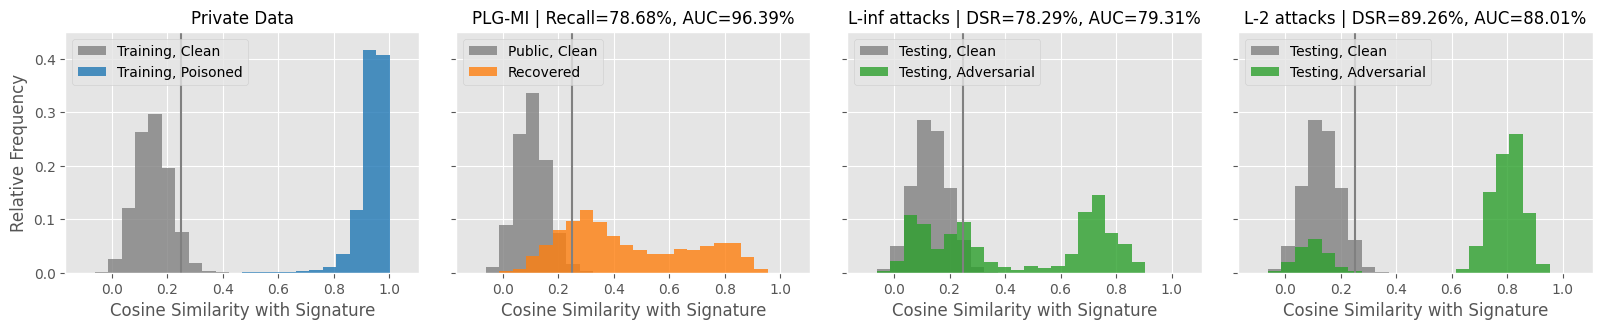

In [3]:
cmap = plt.get_cmap('tab10')
bins = np.linspace(-0.11, 1.05, 25)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(16, 3))
f.tight_layout()
ylim=0.45
font_size='large'

ax1.hist(classwise_cos_clean, bins, alpha=0.8, label='Training, Clean', weights=torch.ones_like(classwise_cos_clean) / classwise_cos_clean.shape[0], color='0.5')
ax1.hist(classwise_cos_poisoned, bins, alpha=0.8, label='Training, Poisoned', weights=torch.ones_like(classwise_cos_poisoned) / classwise_cos_poisoned.shape[0], color=cmap.colors[0])
ax1.axvline(x=classwise_threshold, color='gray')
ax1.legend(loc='upper left')
ax1.set_ylim(0, ylim)
ax1.set_ylabel('Relative Frequency')
ax1.set_xlabel('Cosine Similarity with Signature')
ax1.set_title('Private Data', fontsize=font_size)

recall = (classwise_cos_recovered > classwise_threshold).float().mean()
acc = torch.concat([
    classwise_cos_gan <= classwise_threshold,
    classwise_cos_recovered > classwise_threshold
]).float().mean()
rocauc = roc_auc_score(np.concatenate([np.zeros(classwise_cos_gan.shape), np.ones(classwise_cos_recovered.shape)]), np.concatenate([classwise_cos_gan, classwise_cos_recovered]))

ax2.hist(classwise_cos_gan, bins, alpha=0.8, label='Public, Clean', weights=torch.ones_like(classwise_cos_gan) / classwise_cos_gan.shape[0], color='0.5')
ax2.hist(classwise_cos_recovered, bins, alpha=0.8, label='Recovered', weights=torch.ones_like(classwise_cos_recovered) / classwise_cos_recovered.shape[0], color=cmap.colors[1])
ax2.axvline(x=classwise_threshold, color='gray')
ax2.legend(loc='upper left')
ax2.set_ylim(0, ylim)
ax2.set_xlabel('Cosine Similarity with Signature')
ax2.set_title(f'PLG-MI | Recall={recall*100:.2f}%, AUC={rocauc*100:.2f}%', fontsize=font_size)

acc = torch.concat([
    classwise_cos_test <= classwise_threshold,
    classwise_cos_adv_inf > classwise_threshold
]).float().mean()
rocauc = roc_auc_score(np.concatenate([np.zeros(classwise_cos_test.shape), np.ones(classwise_cos_adv_inf.shape)]), np.concatenate([classwise_cos_test, classwise_cos_adv_inf]))

ax3.hist(classwise_cos_test, bins, alpha=0.8, label='Testing, Clean', weights=torch.ones_like(classwise_cos_test) / classwise_cos_test.shape[0], color='0.5')
ax3.hist(classwise_cos_adv_inf, bins, alpha=0.8, label='Testing, Adversarial', weights=torch.ones_like(classwise_cos_adv_inf) / classwise_cos_adv_inf.shape[0], color=cmap.colors[2])
ax3.axvline(x=classwise_threshold, color='gray')
ax3.legend(loc='upper left')
ax3.set_ylim(0, ylim)
ax3.set_xlabel('Cosine Similarity with Signature')
ax3.set_title(f'L-inf attacks | DSR={acc*100:.2f}%, AUC={rocauc*100:.2f}%', fontsize=font_size)

acc = torch.concat([
    classwise_cos_test <= classwise_threshold,
    classwise_cos_adv_l2 > classwise_threshold
]).float().mean()
rocauc = roc_auc_score(np.concatenate([np.zeros(classwise_cos_test.shape), np.ones(classwise_cos_adv_l2.shape)]), np.concatenate([classwise_cos_test, classwise_cos_adv_l2]))

ax4.hist(classwise_cos_test, bins, alpha=0.8, label='Testing, Clean', weights=torch.ones_like(classwise_cos_test) / classwise_cos_test.shape[0], color='0.5')
ax4.hist(classwise_cos_adv_l2, bins, alpha=0.8, label='Testing, Adversarial', weights=torch.ones_like(classwise_cos_adv_l2) / classwise_cos_adv_l2.shape[0], color=cmap.colors[2])
ax4.axvline(x=classwise_threshold, color='gray')
ax4.legend(loc='upper left')
ax4.set_ylim(0, ylim)
ax4.set_xlabel('Cosine Similarity with Signature')
ax4.set_title(f'L-2 attacks | DSR={acc*100:.2f}%, AUC={rocauc*100:.2f}%', fontsize=font_size)

plt.show()